In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from IPython.display import Image


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
model = tf.keras.applications.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [5]:

model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [6]:

def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

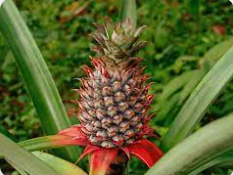

In [8]:
Image(filename='/content/gdrive/MyDrive/images/pineapple.jpg', width=300,height=200)

In [9]:

preprocessed_image = prepare_image('pineapple.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 8s 8s/step


In [10]:
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n07753275', 'pineapple', 0.99915624),
  ('n13133613', 'ear', 0.00043942587),
  ('n07730033', 'cardoon', 0.000232699),
  ('n11939491', 'daisy', 6.443517e-05),
  ('n12144580', 'corn', 5.8432415e-05)]]

In [11]:
model = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [13]:
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
preprocessed_image = prepare_image('pineapple.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 2s 2s/step


[[('n07753275', 'pineapple', 0.9488847),
  ('n07730033', 'cardoon', 0.006751515),
  ('n13133613', 'ear', 0.0059596007),
  ('n11939491', 'daisy', 0.0016045304),
  ('n04141327', 'scabbard', 0.00061589316)]]

In [14]:
model = tf.keras.applications.MobileNetV3Small()
model.summary()

10734624/10734624 [==============================] - 0s 0us/step
Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)        

In [16]:
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
preprocessed_image = prepare_image('matchstick.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 27ms/step


[[('n03729826', 'matchstick', 0.050922778),
  ('n01930112', 'nematode', 0.050805897),
  ('n03196217', 'digital_clock', 0.027137415),
  ('n03666591', 'lighter', 0.021858176),
  ('n04286575', 'spotlight', 0.020021185)]]